<a href="https://colab.research.google.com/github/RoshanKumar854/DSE-Projects/blob/main/Trix_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
df = pd.read_csv('wage.csv')

In [25]:
print(df)

      Unnamed: 0  year  age  ... health_ins   logwage        wage
0         231655  2006   18  ...      2. No  4.318063   75.043154
1          86582  2004   24  ...      2. No  4.255273   70.476020
2         161300  2003   45  ...     1. Yes  4.875061  130.982177
3         155159  2003   43  ...     1. Yes  5.041393  154.685293
4          11443  2005   50  ...     1. Yes  4.318063   75.043154
...          ...   ...  ...  ...        ...       ...         ...
2995      376816  2008   44  ...     1. Yes  5.041393  154.685293
2996      302281  2007   30  ...      2. No  4.602060   99.689464
2997       10033  2005   27  ...      2. No  4.193125   66.229408
2998       14375  2005   27  ...     1. Yes  4.477121   87.981033
2999      453557  2009   55  ...     1. Yes  4.505150   90.481913

[3000 rows x 12 columns]


In [27]:
print(x)

      age      education     health
0      18      < HS Grad       Good
1      24   College Grad  Very Good
2      45   Some College       Good
3      43   College Grad  Very Good
4      50        HS Grad       Good
...   ...            ...        ...
2995   44   Some College  Very Good
2996   30        HS Grad  Very Good
2997   27      < HS Grad       Good
2998   27   Some College  Very Good
2999   55        HS Grad       Good

[3000 rows x 3 columns]


In [44]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['education'] = label_encoder.fit_transform(df['education']) 
df['health'] = label_encoder.fit_transform(df['health'])

In [45]:
df['education']
df['health']

0       0
1       1
2       0
3       1
4       0
       ..
2995    1
2996    1
2997    0
2998    1
2999    0
Name: health, Length: 3000, dtype: int64

In [56]:
x = df[['age','education','health']]
y = df['logwage']

In [47]:
print(x)

      age  education  health
0      18          0       0
1      24          2       1
2      45          4       0
3      43          2       1
4      50          3       0
...   ...        ...     ...
2995   44          4       1
2996   30          3       1
2997   27          0       0
2998   27          4       1
2999   55          3       0

[3000 rows x 3 columns]


In [48]:
import statsmodels.api as sm
x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit()
results1=model1.summary(alpha=0.05)
print(results1)

                            OLS Regression Results                            
Dep. Variable:                logwage   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     100.7
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           4.44e-62
Time:                        11:46:15   Log-Likelihood:                -977.79
No. Observations:                3000   AIC:                             1964.
Df Residuals:                    2996   BIC:                             1988.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3042      0.030    141.985      0.0

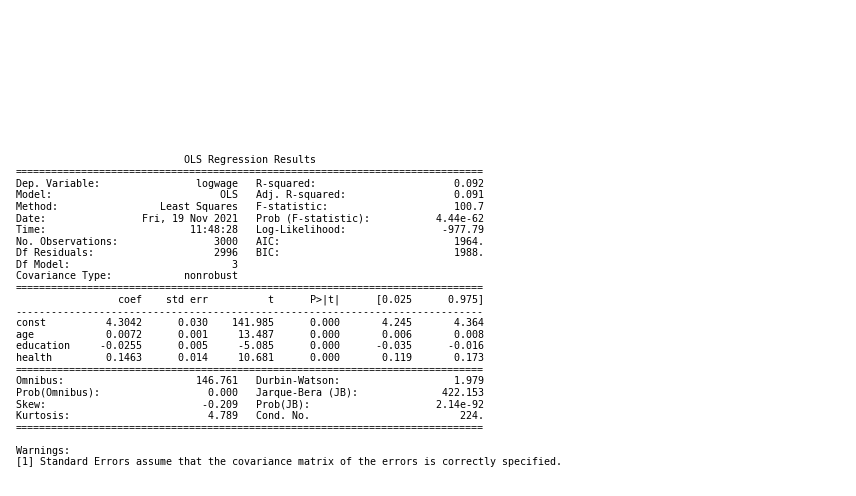

In [50]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model1.summary()), {'fontsize': 12}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('Result1.png')

In [66]:
x = df['health']
y = df['age']

In [67]:
print(y)

0       18
1       24
2       45
3       43
4       50
        ..
2995    44
2996    30
2997    27
2998    27
2999    55
Name: age, Length: 3000, dtype: int64


In [68]:
import statsmodels.api as sm
x = sm.add_constant(x)
model2 = sm.OLS(y, x).fit()
results2=model2.summary(alpha=0.05)
print(results2)

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     58.99
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           2.14e-14
Time:                        11:59:20   Log-Likelihood:                -11565.
No. Observations:                3000   AIC:                         2.313e+04
Df Residuals:                    2998   BIC:                         2.315e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.9476      0.390    115.163      0.0

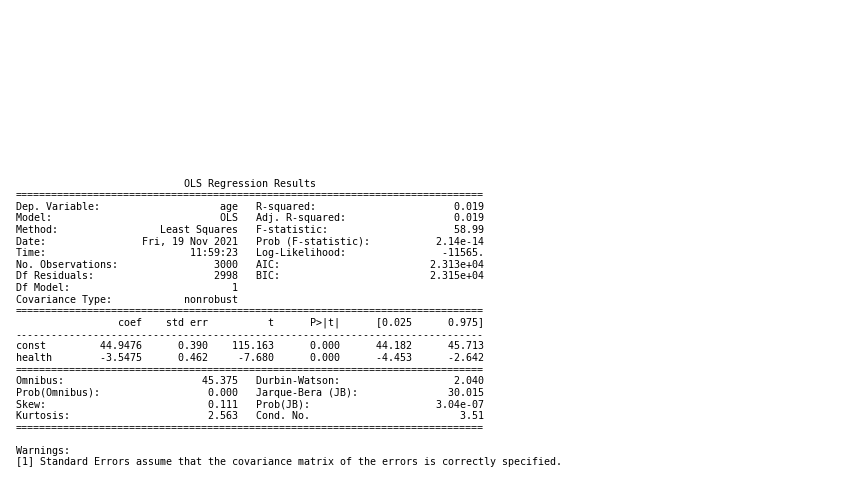

In [69]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model2.summary()), {'fontsize': 12}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('Result2.png')

In [72]:
ypred = model2.predict(x)
print(ypred)

0       44.947552
1       41.400093
2       44.947552
3       41.400093
4       44.947552
          ...    
2995    41.400093
2996    41.400093
2997    44.947552
2998    41.400093
2999    44.947552
Length: 3000, dtype: float64


In [83]:
residual_age=y-ypred

In [84]:
print(residual_age)

0      -530.003497
1      -459.002334
2       -42.587413
3        27.395892
4       207.674825
           ...    
2995     72.995798
2996   -383.402894
2997   -529.531469
2998   -430.202614
2999    507.937063
Length: 3000, dtype: float64


In [89]:
x = df['health']
y = df['education']

In [90]:
import statsmodels.api as sm
x = sm.add_constant(x)
model3 = sm.OLS(y, x).fit()
results3=model3.summary(alpha=0.05)
print(results3)

                            OLS Regression Results                            
Dep. Variable:              education   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.138
Date:                Fri, 19 Nov 2021   Prob (F-statistic):             0.0420
Time:                        12:09:17   Log-Likelihood:                -4862.2
No. Observations:                3000   AIC:                             9728.
Df Residuals:                    2998   BIC:                             9740.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5082      0.042     60.022      0.0

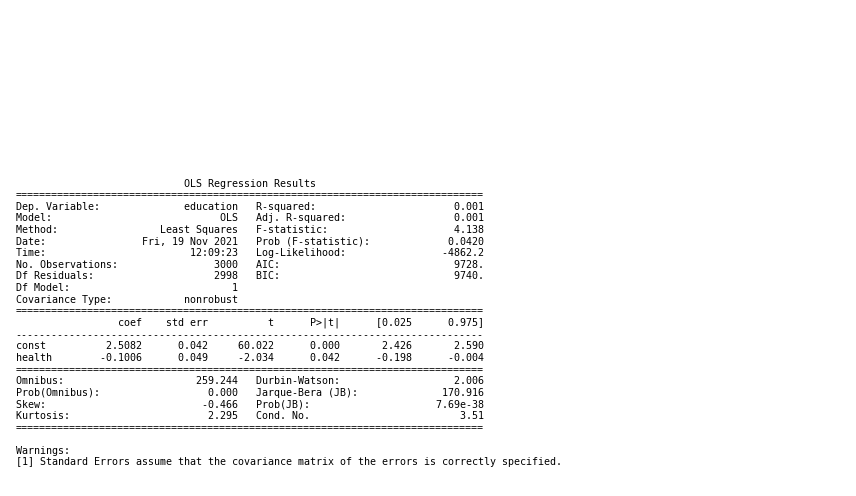

In [91]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model3.summary()), {'fontsize': 12}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('Result3.png')

In [92]:
ypred = model3.predict(x)
print(ypred)

0       2.508159
1       2.407563
2       2.508159
3       2.407563
4       2.508159
          ...   
2995    2.407563
2996    2.407563
2997    2.508159
2998    2.407563
2999    2.508159
Length: 3000, dtype: float64


In [93]:
residual_education=y-ypred

In [94]:
print(residual_education)

0      -2.508159
1      -0.407563
2       1.491841
3      -0.407563
4       0.491841
          ...   
2995    1.592437
2996    0.592437
2997   -2.508159
2998    1.592437
2999    0.491841
Length: 3000, dtype: float64


In [95]:
from google.colab import files
residual_education.to_csv('residual_education.csv')

In [149]:
residual_age

residual_age
0      -530.003497
1      -459.002334
2       -42.587413
3        27.395892
4       207.674825
           ...    
2995     72.995798
2996   -383.402894
2997   -529.531469
2998   -430.202614
2999    507.937063
Length: 3000, dtype: float64

In [154]:
x = pd.concat([residual_age, residual_education], axis = 1)
y = df['logwage']

In [155]:
print(x)

               0         1
0    -530.003497 -2.508159
1    -459.002334 -0.407563
2     -42.587413  1.491841
3      27.395892 -0.407563
4     207.674825  0.491841
...          ...       ...
2995   72.995798  1.592437
2996 -383.402894  0.592437
2997 -529.531469 -2.508159
2998 -430.202614  1.592437
2999  507.937063  0.491841

[3000 rows x 2 columns]


In [131]:
import statsmodels.api as sm
x = sm.add_constant(x)
model4 = sm.OLS(y, x).fit()
results4=model4.summary(alpha=0.05)
print(results4)

                            OLS Regression Results                            
Dep. Variable:                logwage   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     52.73
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           3.11e-23
Time:                        12:59:51   Log-Likelihood:                -1070.0
No. Observations:                3000   AIC:                             2146.
Df Residuals:                    2997   BIC:                             2164.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6450      0.006    725.511      0.0